In [6]:
%pwd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Analysis for SNWD Counts

In [8]:
data_dir = "../../Data/Weather/"
%matplotlib inline
!mkdir -p $data_dir
!ls $data_dir

apurva_stations.pickle	ghcnd-stations_buffered.txt  snwd_all_years.pickle
apurva_years.pickle	ghcnd-stations.txt	     stations.pkl
data-source.txt		ghcnd-version.txt	     STAT.pickle
ghcnd-inventory.txt	SampleStations.pickle
ghcnd-readme.txt	snwd_all_stations.pickle


In [9]:
import pickle
Data=pickle.load(open('../../Data/Weather/snwd_all_years.pickle','r'))
STAT,STAT_description=pickle.load(open('../../Data/Weather/STAT.pickle','r'))

In [10]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

In [11]:
Data = sorted(Data)
dictData = dict(Data)
your_keys = dictData.keys()
#your_keys[0:10]
#dictData[1857.0]

In [12]:
def col(i,step):
    zz = numpy.matrix([  dictData[u] for u in your_keys if (int(u) >= i and int(u) < i+step) ])
    #zz = x[i:i+step]
    y = zz.sum(axis=0)
    z = y.tolist()
    yhat = z[0]#savgol_filter(z[0], 31, 9) # window size 51, polynomial order 3
    YearlyPlots(yhat,ttl=str(i) + '-' + str(i+step),y=(min(yhat)-30,max(yhat)+30))
    #YearlyPlots(x,y=(min(x)-10,max(x)+10))

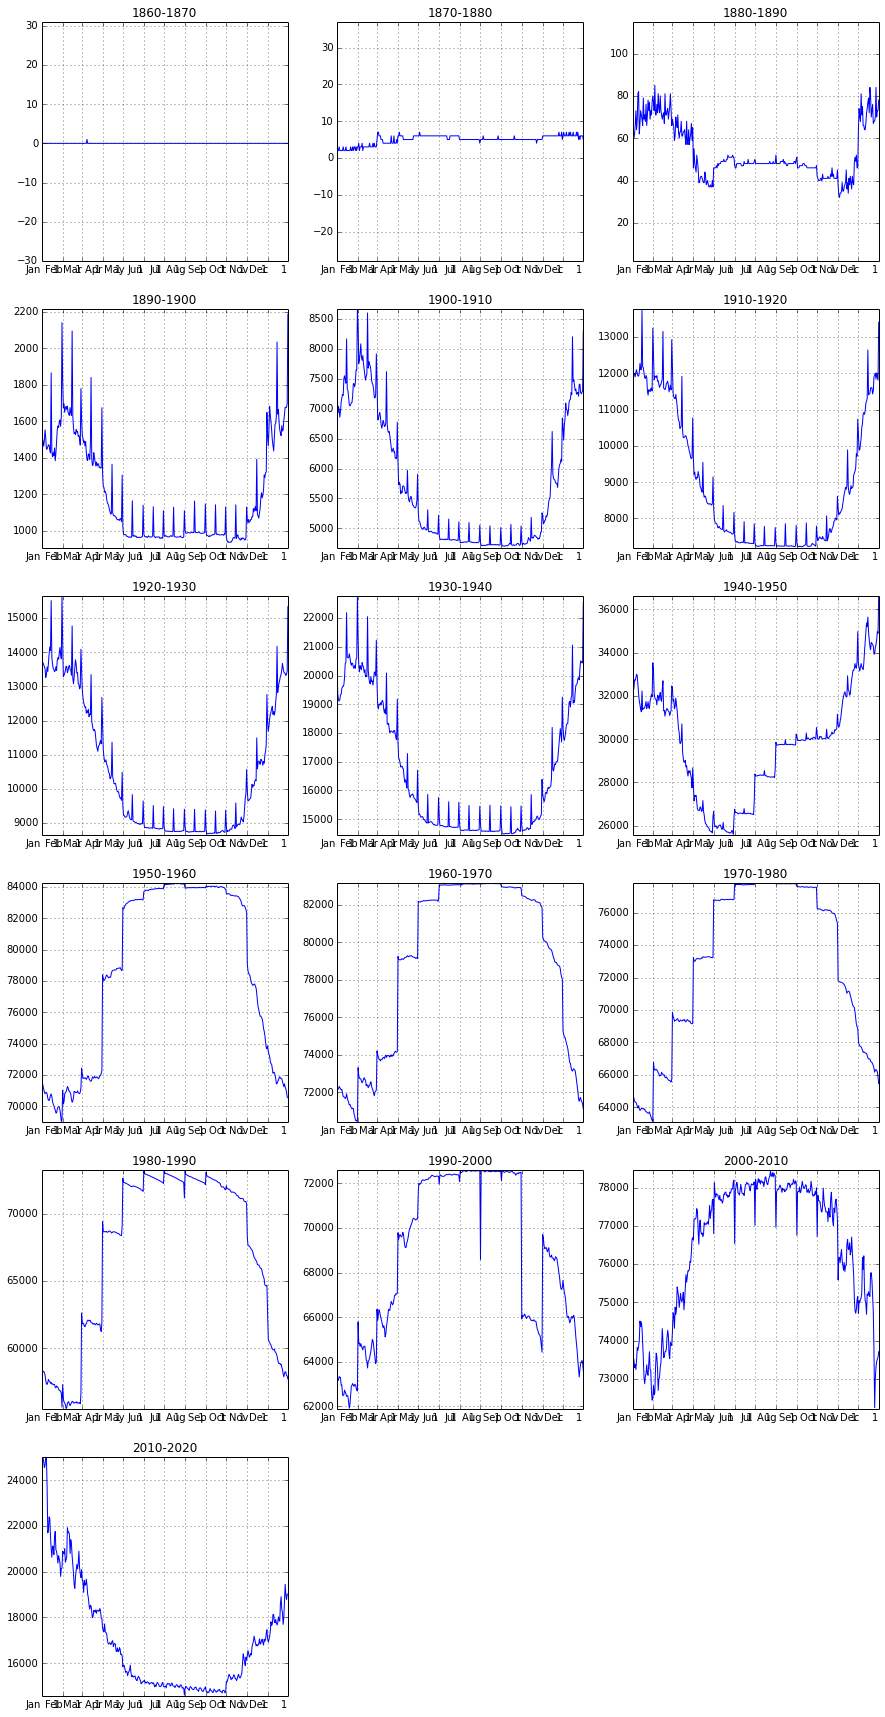

In [13]:
figure(figsize=(15,30))
offset=1
step = 10
for i in range(1860,2015,step):
    subplot(6,3,offset)
    col(i,step)
    offset+=1

## Observations :
1. It can be seen that the data from 1870-1940 have sudden prominent spikes every 15 days. It suggests that during that period some stations only took bi monthly readings for SNWD data.
2. After 1940 readings become consistent and only gets dip during winter season. 
3. The monthly dips seen in TMAX data becomes prominent in 2000-2010 readings indicating more majority of volunteer COOP readings in SNWD data.
4. It can be concluded that the data before 1940 is giving bi monthly reading of snow depth only and can be ignored 

In [14]:
DataS=pickle.load(open('../../Data/Weather/snwd_all_stations.pickle','r'))

In [15]:
DataS = sorted(DataS)
dictData = dict(DataS)
your_keys = dictData.keys()

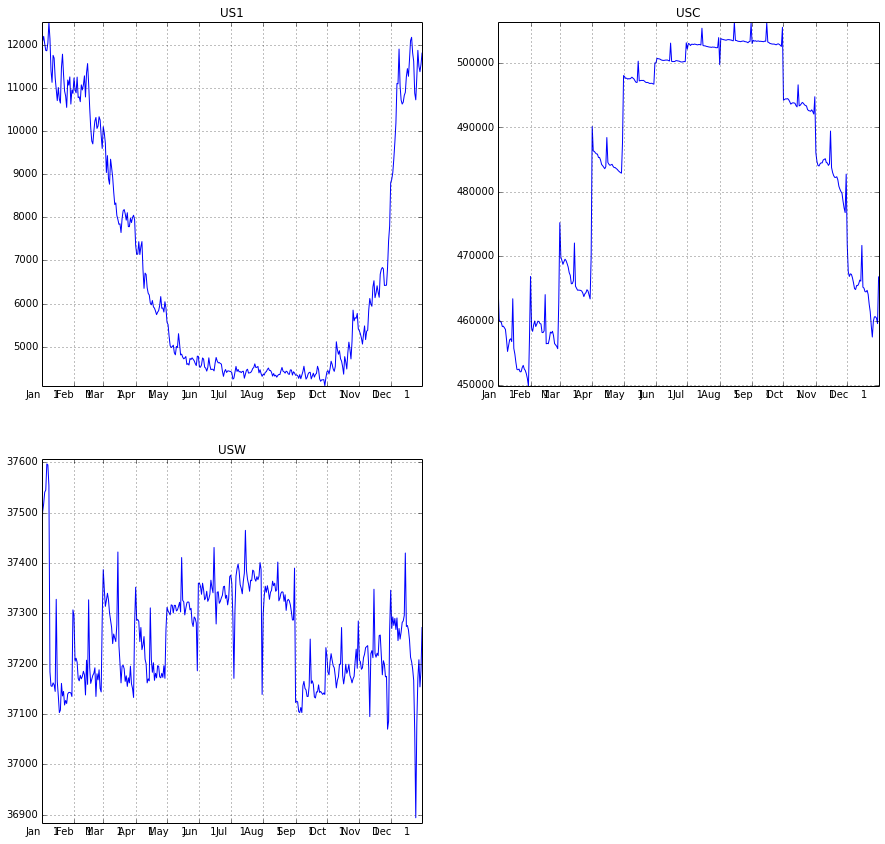

In [16]:
# Plot for readings for different ids of station
idd = ['US0','US1','USC','USE','USM','USN','USR','USS','USW']
offset=1
figure(figsize=(15,30))
your_keys = dictData.keys()
for xxx in idd:
    dict_you_want = { your_key: dictData[your_key] for your_key in your_keys if your_key[0:3] == xxx }
    if (len(dict_you_want.keys()) > 0):
        subplot(4,2,offset)
        offset += 1
        x = np.matrix(dict_you_want.values())
        y = x.sum(axis=0)
        z = (y.tolist())
        YearlyPlots(z[0],ttl=xxx,y=(min(z[0])-10,max(z[0])+10))

## Observations - 
1. The readings of USC are pretty consistent (if we ignore the spikes which can be seperated as discussed above)
2. The dip in December month is present in USC readings which suggests that many stations doesn't contribute to the readings in those months maybe due to heavy snow deposit due to which people are not able to take readings.

## Removal of Readings -
1. Readings can easily be cleaned by ignoring the readings before 1940.
2. Taking only readings where dip at December end is not less than 10-15 % mean value for the station for the whole year
3. If readings have continuous Nan for the week of Holiday we can assume they have been taken by Voluteers only and can be ignored

In [17]:
SNWD=pickle.load(open('../../Data/Weather/snwd_all_stations.pickle','r'))
SNWD = sorted(SNWD)
dictSNWD = dict(SNWD)
keysSNWD = dictSNWD.keys()

In [18]:
TMAX=pickle.load(open('../../Data/Weather/snwd_all_stations.pickle','r'))
TMAX = sorted(TMAX)
dictTMAX = dict(TMAX)
keysTMAX = dictTMAX.keys()

In [19]:
print len(keysSNWD),len(keysTMAX)
print keysSNWD[0],keysTMAX[0]
x =  set(keysSNWD) - set(keysTMAX)
len(x)

34933 34933
USC00390043 USC00390043


0